## Data Preprocessing for Amharic Named Entity Recognition (NER)
The main objective of this notebook is to prepare raw data for Named Entity Recognition (NER). The focus is on data ingestion from Ethiopian Telegram channels and preprocessing Amharic text for entity extraction.

Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
# importing modules from scripts 
from scripts.preprocessing import *

In [4]:
# Load the dataset
df = pd.read_csv('../data/telegram_data.csv')

Display the first few rows of the raw dataset to give an overview of the structure and content of the messages retrieved

In [5]:
df.head()

Channel Title Channel Username     ID  \
0  SINA KIDS/·à≤·äì ·ä™·ãµ·àµ‚ìá        @sinayelj  14841   
1  SINA KIDS/·à≤·äì ·ä™·ãµ·àµ‚ìá        @sinayelj  14840   
2  SINA KIDS/·à≤·äì ·ä™·ãµ·àµ‚ìá        @sinayelj  14839   
3  SINA KIDS/·à≤·äì ·ä™·ãµ·àµ‚ìá        @sinayelj  14838   
4  SINA KIDS/·à≤·äì ·ä™·ãµ·àµ‚ìá        @sinayelj  14837   

                                             Message  \
0                                                NaN   
1                                                NaN   
2  ·àà·äÆ·äï·ã∂·àö·äí·ã®·àù ·àà·å†·â£·â• ·â§·â∂·âΩ ·åà·àã·åç·àå ·ã®·àÜ·äê ·ä®·äï·çÅ·àÖ ·ã®·à≤·àç·ä®·äï ·å•·à¨ ·ä•·âÉ ·ã®·â∞...   
3                                                NaN   
4                                                NaN   

                        Date                  Media Path  
0  2024-09-26 12:24:51+00:00  photos\@sinayelj_14841.jpg  
1  2024-09-26 12:24:51+00:00  photos\@sinayelj_14840.jpg  
2  2024-09-26 12:24:51+00:00  photos\@sinayelj_14839.jpg  
3  2024-09-26 12:24:12+00:00  photos\@sinayelj_14838.jpg  
4  2024-09-26 12:24:12+00:00  photos\@sinayelj_14837.jpg

In [6]:
df.tail()

Channel Title Channel Username   ID  \
4618  SINA KIDS/·à≤·äì ·ä™·ãµ·àµ‚ìá        @sinayelj  599   
4619  SINA KIDS/·à≤·äì ·ä™·ãµ·àµ‚ìá        @sinayelj  598   
4620  SINA KIDS/·à≤·äì ·ä™·ãµ·àµ‚ìá        @sinayelj  197   
4621  SINA KIDS/·à≤·äì ·ä™·ãµ·àµ‚ìá        @sinayelj  182   
4622  SINA KIDS/·à≤·äì ·ä™·ãµ·àµ‚ìá        @sinayelj    1   

                                                Message  \
4618                                                NaN   
4619                 Baby potty\n0905707448\n0945097042   
4620                                                NaN   
4621  ·ãç·ãµ ·ã®·à≤·äì ·ä™·ãµ·àµ ·ã∞·àù·â†·äû·âΩ ·â†·ãµ·åã·àö ·åà·â•·â∑·àç \n·ã®·àò·ãã·äõ ·åà·äï·ã≥ ·âµ·àç·âÖ ·à≥·ã≠·ãù ...   
4622                                                NaN   

                           Date                Media Path  
4618  2021-04-16 18:12:10+00:00  photos\@sinayelj_599.jpg  
4619  2021-04-16 18:12:10+00:00  photos\@sinayelj_598.jpg  
4620  2020-11-26 18:30:52+00:00                       NaN  
4621  2020-11-10 06:59:31+00:00  photos\@sinayelj_182.jpg  
4622  2020-07-24 10:50:43+00:00                       NaN

In [7]:
# check for missing values
df.isnull().sum()

Channel Title          0
Channel Username       0
ID                     0
Message             3268
Date                   0
Media Path           310
dtype: int64

In [8]:
# drop missing values from 'Message' Column
df = df.dropna(subset=['Message'])

In [9]:
df.head()

Channel Title Channel Username     ID  \
2   SINA KIDS/·à≤·äì ·ä™·ãµ·àµ‚ìá        @sinayelj  14839   
6   SINA KIDS/·à≤·äì ·ä™·ãµ·àµ‚ìá        @sinayelj  14835   
9   SINA KIDS/·à≤·äì ·ä™·ãµ·àµ‚ìá        @sinayelj  14832   
16  SINA KIDS/·à≤·äì ·ä™·ãµ·àµ‚ìá        @sinayelj  14825   
26  SINA KIDS/·à≤·äì ·ä™·ãµ·àµ‚ìá        @sinayelj  14815   

                                              Message  \
2   ·àà·äÆ·äï·ã∂·àö·äí·ã®·àù ·àà·å†·â£·â• ·â§·â∂·âΩ ·åà·àã·åç·àå ·ã®·àÜ·äê ·ä®·äï·çÅ·àÖ ·ã®·à≤·àç·ä®·äï ·å•·à¨ ·ä•·âÉ ·ã®·â∞...   
6   Baby romper   ·ä®·àã·ã© ·çà·à≠ ·ãç·àµ·å° ·äÆ·â∞·äï ·ã®·àÜ·äê\n\n2000 birr\...   
9   Chicco 5 in 1 mama bag\n·ä¶·à™·åÖ·äì·àç ·àõ·â¥·à™·ã´·àç\n·â†·à≥·ã≠·ãô ·âµ·àç·âÖ\...   
16  aiebao HIP SEAT CARRIER\n·àù·âπ ·å†·äï·ä´·à´ ·ã®·àç·åÜ·âΩ ·àõ·ãò·ã´\n·â†·â∞·àà...   
26  Kids mat  \n\nüí•4100 ·â•·à≠\n\nSize 1.80*2m\n\nfree...   

                         Date                  Media Path  
2   2024-09-26 12:24:51+00:00  photos\@sinayelj_14839.jpg  
6   2024-09-26 12:24:11+00:00  photos\@sinayelj_14835.jpg  
9   2024-09-26 12:20:22+00:00  photos\@sinayelj_14832.jpg  
16  2024-09-26 12:19:20+00:00  photos\@sinayelj_14825.jpg  
26  2024-09-25 06:15:53+00:00  photos\@sinayelj_14815.jpg

In [10]:
df.isnull().sum()

Channel Title        0
Channel Username     0
ID                   0
Message              0
Date                 0
Media Path          72
dtype: int64

In [11]:
df['Message'].unique()

array(['·àà·äÆ·äï·ã∂·àö·äí·ã®·àù ·àà·å†·â£·â• ·â§·â∂·âΩ ·åà·àã·åç·àå ·ã®·àÜ·äê ·ä®·äï·çÅ·àÖ ·ã®·à≤·àç·ä®·äï ·å•·à¨ ·ä•·âÉ ·ã®·â∞·à∞·à´ ·ã®·àç·åÜ·âΩ ·àõ·å†·â¢·ã´  ·àù·àµ·àâ ·àã·ã≠ ·ä•·äï·ã∞·àö·ã´·ã©·âµ ·àò·â≥·å†·çç ·àò·ãò·à≠·åã·âµ ·ã®·àö·âΩ·àç   3350·â•·à≠   ·ã≠·ã∞·ãç·àâ·àç·äï ·ä•·à≠·à∂ ·àò·àù·å£·âµ ·â£·ã≠·àò·âæ ·ä•·äõ ·ã´·àâ·â†·âµ ·ãµ·à®·àµ ·ä•·äì·ã∞·à≠·àµ·àé·â≥·àà·äï ·àµ·àç·ä≠ 0905707448 0909003864 ·à≤·äì ·ã®·â∞·àò·à®·å°·äì ·å•·à´·â≥·â∏·ãç·äï ·ã®·å†·â†·âÅ ·ã®·àç·åÜ·âΩ ·ä•·âÉ ·ä†·àµ·àò·å™ \n\n\n0909003864\n0905707448  \n\n·ä•·âÉ ·àà·àõ·ãò·ãù ·ä®·àµ·à≠ ·ã´·àà·ãç·äï ·àä·äï·äÆ·âΩ ·â†·àò·å´·äï ·àõ·ãò·ãù ·âµ·âΩ·àã·àã·âπ  \n\n@sinasinaye\n\n@sinayalj2\n\n·ä†·ãµ·à´·àª\n\n 1Ô∏è‚É£·âÅ·å•·à≠1 ·åà·à≠·åÇ ·ä¢·àù·çî·à™·ã´·àç ·ä®·à≥·àö ·àÖ·äï·çÉ ·åé·äï ·ä†·àç·çé·ãù ·çï·àã·ãõ ·åç·à´·ãç·äï·ãµ ·àã·ã≠ ·ä•·äï·ã∞·åà·â° ·ã´·åà·äô·äì·àç\n\n2Ô∏è‚É£·âÅ·å•·à≠2 4·ä™·àé ·âÖ·ãµ·àµ·âµ ·àµ·àã·à¥ ·àÖ·äï·çÉ ·àõ·àà·âµ·àù ·ä®·â•·àç·çÖ·åç·äì ·ãã·äì·çÖ·çà·âµ ·â§·âµ ·àÖ·äï·çÉ ·â†·àµ·â∞ ·âÄ·äù ·â£·àà·ãç ·ä†·àµ·çì·àç·âµ 20·à

- removing unnecessary symbols, numbers, and punctuation from the text data as well as remove english letters. This step is essential for ensuring the text is properly formatted for tokenization and further analysis.
- normalizes Amharic text using Unicode normalization (NFKC form).


In [14]:
# Preprocess the dataset
preprocessed_data = preprocess_dataset(df.to_dict('records'))

In [15]:
# Convert preprocessed data back to a DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data)

In [16]:
# Basic statistics
print("Total number of messages:", len(preprocessed_df))
print("Number of unique channels:", preprocessed_df['Channel_Username'].nunique())

Total number of messages: 1355
Number of unique channels: 1


### Tokenization
 tokenization is performed here. Tokenizing the text involves splitting it into individual words or tokens, which is important for preparing the data for the NER labeling process.

In [18]:
# Token analysis
all_tokens = [token for tokens in preprocessed_df['tokens'] for token in tokens]
token_counts = Counter(all_tokens)

In [19]:
print("Total number of tokens:", len(all_tokens))
print("Number of unique tokens:", len(token_counts))

Total number of tokens: 75972
Number of unique tokens: 3501


### print the unique tokens 

In [20]:
unique_tokens = list(token_counts.keys())  # Get the unique tokens
print("Unique tokens:", unique_tokens)

Unique tokens: ['·àà·äÆ·äï·ã∂·àö·äí·ã®·àù', '·àà·å†·â£·â•', '·â§·â∂·âΩ', '·åà·àã·åç·àå', '·ã®·àÜ·äê', '·ä®·äï·çÅ·àÖ', '·ã®·à≤·àç·ä®·äï', '·å•·à¨', '·ä•·âÉ', '·ã®·â∞·à∞·à´', '·ã®·àç·åÜ·âΩ', '·àõ·å†·â¢·ã´', '·àù·àµ·àâ', '·àã·ã≠', '·ä•·äï·ã∞·àö·ã´·ã©·âµ', '·àò·â≥·å†·çç', '·àò·ãò·à≠·åã·âµ', '·ã®·àö·âΩ·àç', '3350·â•·à≠', '·ã≠·ã∞·ãç·àâ·àç·äï', '·ä•·à≠·à∂', '·àò·àù·å£·âµ', '·â£·ã≠·àò·âæ', '·ä•·äõ', '·ã´·àâ·â†·âµ', '·ãµ·à®·àµ', '·ä•·äì·ã∞·à≠·àµ·àé·â≥·àà·äï', '·àµ·àç·ä≠', '0905707448', '0909003864', '·à≤·äì', '·ã®·â∞·àò·à®·å°·äì', '·å•·à´·â≥·â∏·ãç·äï', '·ã®·å†·â†·âÅ', '·ä†·àµ·àò·å™', '·àà·àõ·ãò·ãù', '·ä®·àµ·à≠', '·ã´·àà·ãç·äï', '·àä·äï·äÆ·âΩ', '·â†·àò·å´·äï', '·àõ·ãò·ãù', '·âµ·âΩ·àã·àã·âπ', '@', '@2', '·ä†·ãµ·à´·àª', '·âÅ·å•·à≠', '·åà·à≠·åÇ', '·ä¢·àù·çî·à™·ã´·àç', '·ä®·à≥·àö', '·àÖ·äï·çÉ', '·åé·äï', '·ä†·àç·çé·ãù', '·çï·àã·ãõ', '·åç·à´·ãç·äï·ãµ', '·ä•·äï·ã∞·åà·â°', '·ã´·åà·äô·äì·àç', '2·âÅ·å•·à≠2', '4·ä™·àé', '·âÖ·ãµ·àµ·âµ', '·àµ·àã·à¥', '·àõ·àà·âµ·àù', '·ä®·â•·àç·çÖ·åç·äì', '·ãã·äì·çÖ·çà·âµ', 

### most common tokens

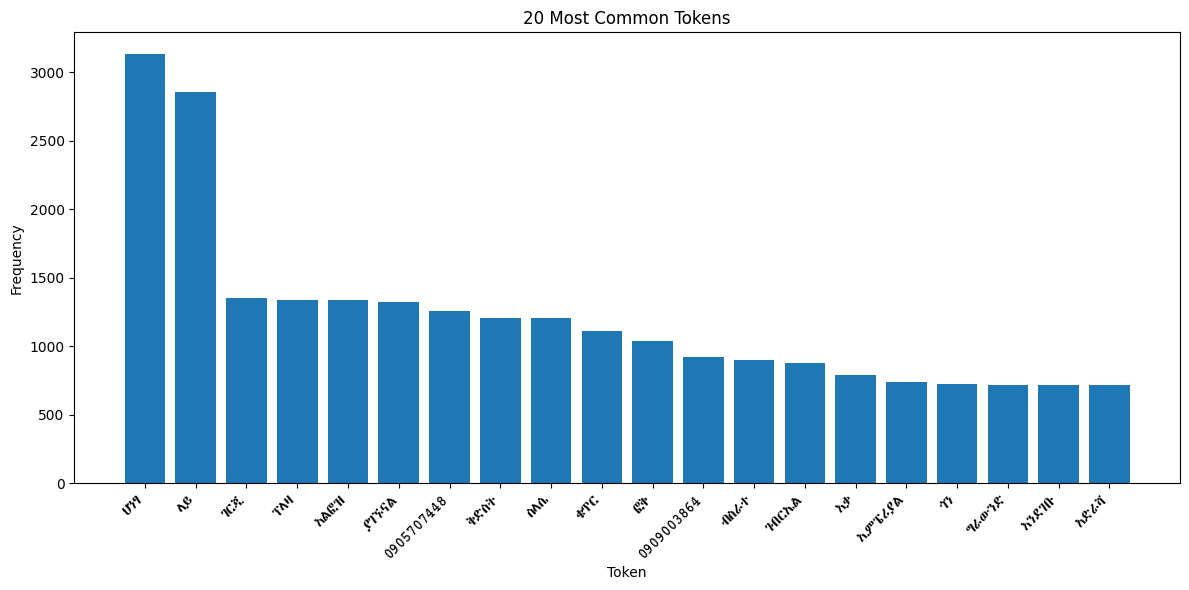

In [21]:
from matplotlib import font_manager
font='./washrab.ttf'
property = font_manager.FontProperties(fname=font)
plt.figure(figsize=(12, 6))
plt.bar(*zip(*token_counts.most_common(20)))
plt.title('20 Most Common Tokens')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontproperties=property)
plt.tight_layout()
plt.show()

### Message length analysis

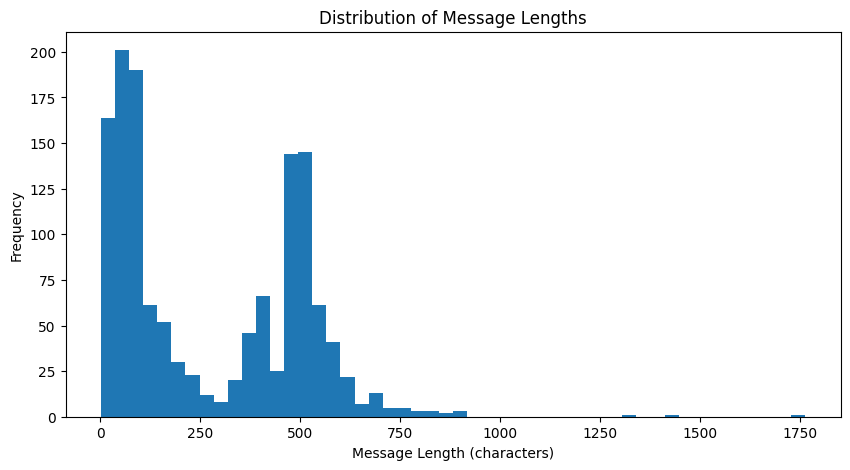

In [22]:
# Message length analysis
preprocessed_df['message_length'] = preprocessed_df['cleaned_message'].str.len()

plt.figure(figsize=(10, 5))
plt.hist(preprocessed_df['message_length'], bins=50)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length (characters)')
plt.ylabel('Frequency')
plt.show()

### Time series analysis

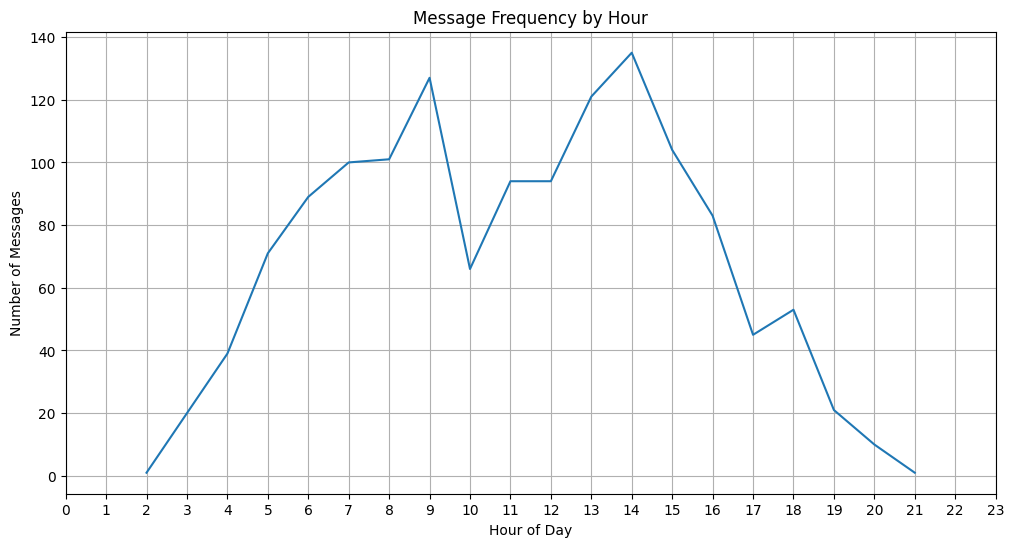

In [23]:
# Time analysis
preprocessed_df['Date'] = pd.to_datetime(preprocessed_df['Date'])
preprocessed_df['hour'] = preprocessed_df['Date'].dt.hour

hourly_counts = preprocessed_df['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(hourly_counts.index, hourly_counts.values)
plt.title('Message Frequency by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Messages')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### Channel analysis
we used only single channel [SinayelJ](https://t.me/sinayelj)


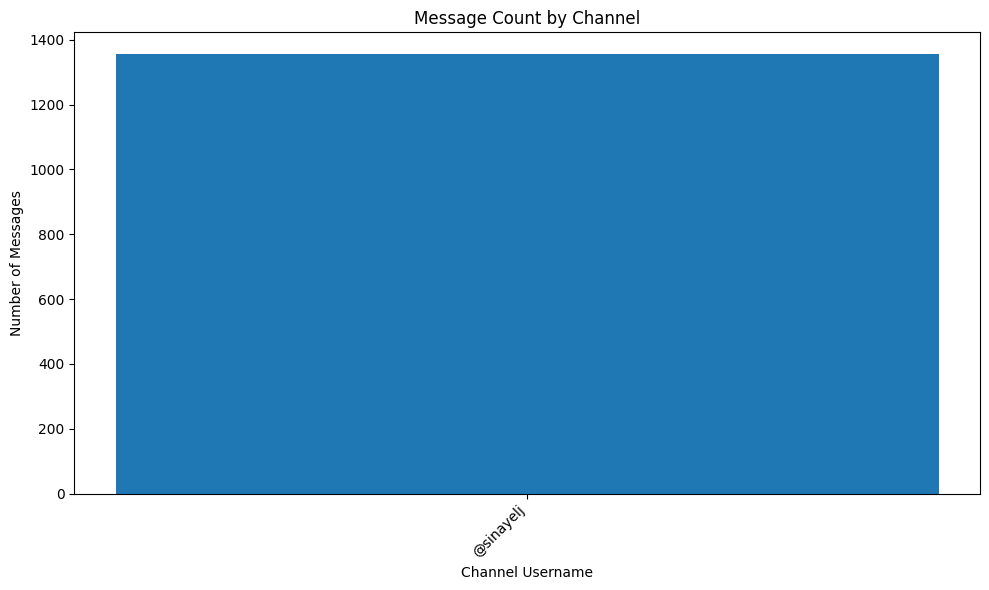

In [25]:
# Channel analysis
channel_counts = preprocessed_df['Channel_Username'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(channel_counts.index, channel_counts.values)
plt.title('Message Count by Channel')
plt.xlabel('Channel Username')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Media analysis

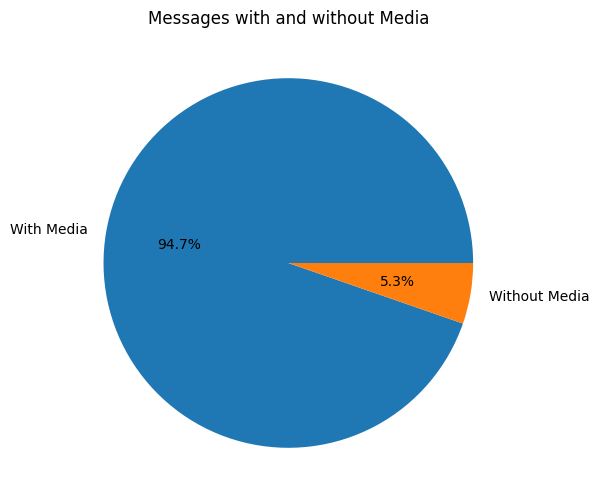

In [26]:
# Media analysis
media_counts = preprocessed_df['Media_Path'].notna().value_counts()
plt.figure(figsize=(8, 6))
plt.pie(media_counts, labels=['With Media', 'Without Media'], autopct='%1.1f%%')
plt.title('Messages with and without Media')
plt.show()

In [27]:
 #Save preprocessed data
preprocessed_df.to_csv('../data/preprocessed_telegram_messages.csv', index=False)
print("Preprocessed data saved to 'preprocessed_telegram_messages.csv'")

Preprocessed data saved to 'preprocessed_telegram_messages.csv'
